In [2]:
import json
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Class

In [3]:
class ImgSet:
    def __init__(self, train=True):
        self.PATH = '../../dataset/'
        self.train_img_path = sorted(glob(self.PATH+'train/*'))
        self.test_img_path = sorted(glob(self.PATH+'test/*'))
        self.train = train
        
        if self.train:
            with open(self.PATH + 'train.json', mode='r') as j:
                self.json = json.load(j)
            self.make_cat2name()
            self.df = pd.DataFrame(self.json['annotations'])
            self.df['object'] = self.df['category_id'].apply(self.cat2name)

        else:
            with open(self.PATH + 'test.json', mode='r') as j:
                self.json = json.load(j)
        
        
    def __getitem__(self, img_id):
        if self.train:
            img_info = [info for info in self.json['annotations'] if info['image_id'] == img_id]
            img_path = f'{self.PATH}train/{img_id:04d}.jpg'
            img = Image.open(img_path)
            return img_info, np.array(img)
        else:
            # img_info = [info for info in self.json['annotations'] if info['image_id'] == img_id]
            img_path = f'{self.PATH}test/{img_id:04d}.jpg'
            img = Image.open(img_path)
            return np.array(img)            
    def __len__(self):
        return len(self.json['images'])
    
    def make_cat2name(self):
        self.cat2name_dict = {}
        for line in self.json['categories']:
            cat_id = line['id']
            name = line['name']
            self.cat2name_dict[cat_id] = name
    
    def cat2name(self, cat_id):
        return self.cat2name_dict[cat_id]
    
    def vis(self, img_id, color='royalblue'):
        infos, img = self.__getitem__(img_id)
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(img)

        for info in infos:
            cat_id = info['category_id']
            bbox = info['bbox']
            ax.add_patch(patches.Rectangle(
                (bbox[0], bbox[1]), bbox[2], bbox[3], edgecolor=color, 
                fill=False, lw=3
            ))
            plt.text(bbox[0], bbox[1], s=imgset.cat2name(cat_id), color='white', size=10, bbox=dict(facecolor=color, edgecolor=color))

        plt.title(f'image id: {info["image_id"]}, # of object: {len(infos)}', size=20)
        plt.axis('off')
        plt.show()

In [337]:
trainset = ImgSet()
testset = ImgSet(train=False)

In [339]:
len(trainset), len(testset)

(4883, 4871)

In [303]:
imgset = ImgSet()

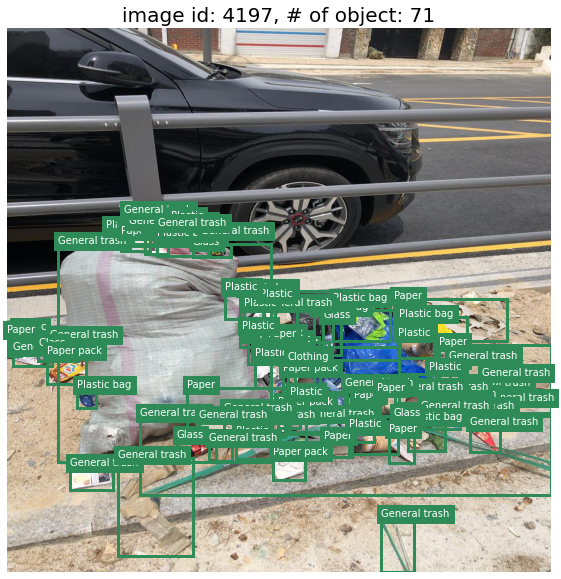

In [305]:
imgset.vis(4197, 'seagreen')

# Visualization

In [289]:
imgset.df.query('image_id == 4197')#.value_counts('object')

,image_id,category_id,area,bbox,iscrowd,id,object,x_min,y_min,x_max,y_max
19857,4197,5,2211.86,"[11.5, 567.6, 51.8, 42.7]",0,19857,Plastic,11.5,567.6,63.3,610.3
19858,4197,1,1064.24,"[0.0, 574.0, 25.1, 42.4]",0,19858,Paper,0.0,574.0,25.1,616.4
19859,4197,0,442.68,"[80.3, 583.6, 37.2, 11.9]",0,19859,General trash,80.3,583.6,117.5,595.5
19860,4197,0,2247.50,"[11.2, 605.7, 72.5, 31.0]",0,19860,General trash,11.2,605.7,83.7,636.7
19861,4197,4,2031.12,"[57.6, 597.8, 72.8, 27.9]",0,19861,Glass,57.6,597.8,130.4,625.7
...,...,...,...,...,...,...,...,...,...,...,...
19923,4197,0,1636.00,"[228.6, 368.0, 40.0, 40.9]",0,19923,General trash,228.6,368.0,268.6,408.9
19924,4197,0,11041.47,"[220.1, 346.9, 176.1, 62.7]",0,19924,General trash,220.1,346.9,396.2,409.6
19925,4197,0,784.03,"[365.0, 386.8, 48.1, 16.3]",0,19925,General trash,365.0,386.8,413.1,403.1
19926,4197,5,1990.04,"[307.8, 358.9, 55.9, 35.6]",0,19926,Plastic,307.8,358.9,363.7,394.5


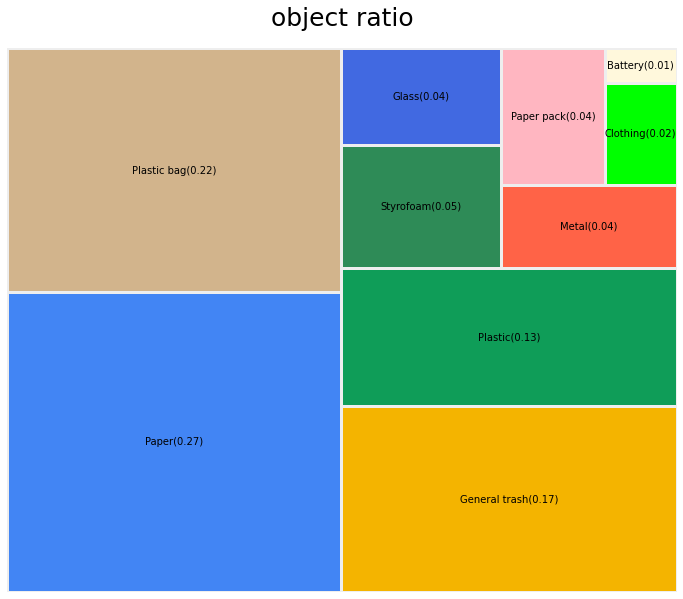

In [120]:
import squarify

fig, ax = plt.subplots(figsize=(12, 10))
vc = imgset.df.value_counts('object')
labels = [f'{label}({round(per, 2)})' for label, per in zip(vc.index, vc/vc.sum())]

colors = ['#4285F4', 'tan', '#F4B400', '#0F9D58', 'seagreen', 'royalblue', 'tomato', 'lightpink', 'lime', 'cornsilk']
squarify.plot(vc, label=labels, color=colors, bar_kwargs=dict(linewidth=3, edgecolor='#eee'),
             text_kwargs={'weight':'normal'})

plt.title('object ratio', size=25, y=1.03)
plt.axis('off')
plt.show()

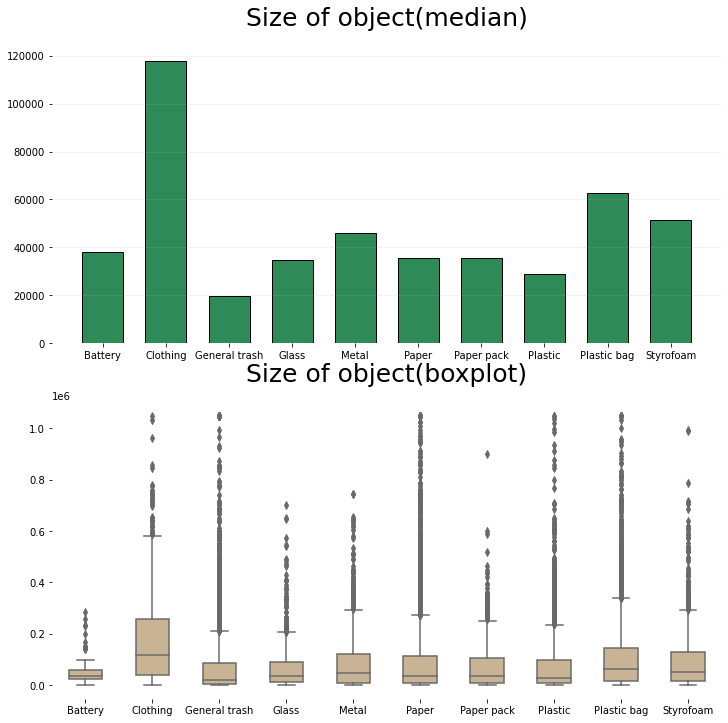

In [259]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
size = imgset.df.groupby('object')['area'].median().sort_index()
axes[0].bar(size.index, size, width=0.65, linewidth=1, color='seagreen', edgecolor='black')
axes[0].set(frame_on=False)
axes[0].grid(axis='y', alpha=0.2)
axes[0].set_title('Size of object(median)', size=25, y=1.05)
# axes[0].set_xticks([])

sns.boxplot(x = 'object', y = 'area', data=imgset.df.sort_values('object'), color='tan', ax=axes[1], width=0.5, dodge=0.9)
axes[1].set_title('')
axes[1].set(frame_on=False)
axes[1].set_ylabel('')
axes[1].set_xlabel('')
# axes[1].set_xticks([])
axes[1].set_title('Size of object(boxplot)', size=25, y=1.05)

plt.show()

In [254]:
imgset.df['x_min'] = imgset.df['bbox'].apply(lambda x: x[0])
imgset.df['y_min'] = imgset.df['bbox'].apply(lambda x: x[1])
imgset.df['x_max'] = imgset.df['bbox'].apply(lambda x: x[0] + x[2])
imgset.df['y_max'] = imgset.df['bbox'].apply(lambda x: x[1] + x[3])

imgset.df

,image_id,category_id,area,bbox,iscrowd,id,object,x_min,y_min,x_max,y_max
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0,General trash,197.6,193.7,745.4,663.4
1,1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0,1,Metal,0.0,407.4,57.6,588.0
2,1,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0,2,Plastic bag,0.0,455.6,144.6,637.2
3,1,4,69096.17,"[722.3, 313.4, 274.3, 251.9]",0,3,Glass,722.3,313.4,996.6,565.3
4,1,5,24164.58,"[353.2, 671.0, 233.7, 103.4]",0,4,Plastic,353.2,671.0,586.9,774.4
...,...,...,...,...,...,...,...,...,...,...,...
23139,4882,5,768591.81,"[0.0, 116.2, 944.1, 814.1]",0,23139,Plastic,0.0,116.2,944.1,930.3
23140,4882,7,57309.72,"[302.1, 439.3, 265.2, 216.1]",0,23140,Plastic bag,302.1,439.3,567.3,655.4
23141,4882,0,1772.74,"[511.3, 451.1, 58.7, 30.2]",0,23141,General trash,511.3,451.1,570.0,481.3
23142,4882,1,53008.67,"[255.0, 421.4, 271.7, 195.1]",0,23142,Paper,255.0,421.4,526.7,616.5


# -------------------------------------------------------------------

# 이미지 평균 분산 구하기

In [14]:
from tqdm.notebook import tqdm

In [56]:
def get_stats():
    trainset =ImgSet()

    n = len(trainset)
    
    _mean = np.mean([np.mean(trainset[i][1], axis=(0, 1)) for i in tqdm(range(n))], axis=0)
    _std = np.mean([np.std(trainset[i][1], axis=(0, 1)) for i in tqdm(range(n))], axis=0)
    
    return _mean, _std


In [57]:
mean, std = get_stats()

  0%|          | 0/4883 [00:00<?, ?it/s]

  0%|          | 0/4883 [00:00<?, ?it/s]

In [58]:
mean, std

(array([123.6506697 , 117.39730243, 110.07542563]),
 array([54.03457934, 53.36968771, 54.78390763]))

In [66]:
data = dict(
    samples_per_gpu=2, #batch size
    workers_per_gpu=2, # num of worker
    train=dict(
        type=11,
        classes = 10, 
        ann_file='fold_0_train.json',
        img_prefix=1,
        pipeline=1),
    val=dict(
        type=1,
        classes = 1, 
        # ann_file=data_root + 'fold_0_val.json',
        img_prefix=1,
        pipeline=1),
    test=dict(
        type=1,
        classes = 1, 
        ann_file='test.json',
        img_prefix=1,
        pipeline=1))

In [67]:
data['train']['ann_file']

'fold_0_train.json'